#### Рудзянский Артемий БИБ201
# Домашнее задание 3

In [121]:
import numpy as np
import pandas as pd
import sklearn

In [122]:
# to plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Задание 1: EM-алгоритм

**Открыть датасет sklearn.datasets.load_wine, содержащий информацию о трех различных сортах вина (class0, class1, class2). Ответить
на вопросы ниже, используя средства языка Python и необходимых
библиотек**

In [123]:
from sklearn.datasets import load_wine
data = load_wine()
data.target[[10, 80, 140]]
list(data.target_names)

['class_0', 'class_1', 'class_2']

Преобразование данных из sklearn в pandas датасет

In [124]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Анализ содержания

In [125]:
display(df['target'].unique(), df.shape)

array([0, 1, 2])

(178, 14)

По итогу имеем три класса и 13 признаков.
Датасет иммет 178 объектов (маловато).

Выведем названия всех признаков

In [126]:
display(*list(df))

'alcohol'

'malic_acid'

'ash'

'alcalinity_of_ash'

'magnesium'

'total_phenols'

'flavanoids'

'nonflavanoid_phenols'

'proanthocyanins'

'color_intensity'

'hue'

'od280/od315_of_diluted_wines'

'proline'

'target'

**Используя файл *Sem5_EM.ipynb*, модифицировать алгоритм EM
так, чтобы он умел распознавать три класса (в исходной реализации
умеем делать только бинарную классификацию)**

# Задание 2: kNN

kNN - k-Nearest Neighbors
k ближайших соседей. Алгоритм классификации. Для каждого из объектов мы определяем 

In [127]:
import numpy as np
import pandas as pd

# stable output across runs
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

In [128]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [129]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [130]:
# for label in df.columns[:-1]:
#     plt.hist(df[df["target"]==0][label], color='blue', label='class 0', alpha=0.7, density=True)
#     plt.hist(df[df["target"]==1][label], color='red', label='class 1', alpha=0.7, density=True)
#     plt.hist(df[df["target"]==2][label], color='yellow', label='class 2', alpha=0.7, density=True)
#     plt.title(label)
#     plt.ylabel("Probability")
#     plt.xlabel(label)
#     plt.legend()
#     plt.show()

## Train, validation, test datasets

In [131]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

[RandomOverSampler](https://imbalanced-learn.org/stable/over_sampling.html)

In [132]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler() # добавляем новые объекты для того, чтобы уравнять наборы классов (генерируем их случайным образом)
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [133]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*(len(df)))])
print(len(train), len(train[train["target"]==0]),
        len(train[train["target"]==1]), 
        len(train[train["target"]==2]), 
        "\n",
        len(valid), len(test))

train, X_train, y_train = scale_dataset(train, oversample=True)
print( len(y_train), sum(y_train == 0), sum(y_train == 1), sum(y_train == 2) )

valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

106 36 43 27 
 36 36
129 43 43 43


In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [136]:
y_pred = knn_model.predict(X_test)

In [137]:
y_test == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True])

In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.86      0.92        14
           2       1.00      1.00      1.00        11

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



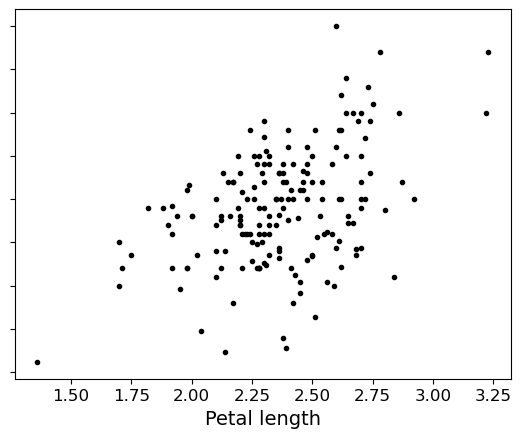

In [139]:
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

# <font color='yellow'>
### Stratified K-Fold

In [166]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import accuracy_score

def skf_cv(X_train, y_train, k):
    sum_accuracy = 0
    skfolds = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    for train_index, test_index in skfolds.split(X_train, y_train):
        clone_model = clone(knn_model)
        X_train_folds = X_train[train_index] # набор для обучения
        y_train_folds = y_train[train_index] # реальные метки для обучения
        X_test_fold = X_train[test_index] # набор для валидации (промежуточного тестирования)
        y_test_fold = y_train[test_index] # реальные метки
    
        clone_model.fit(X_train_folds, y_train_folds) # обучение
        y_pred = clone_model.predict(X_test_fold) # обработка validation set (dev-set)
        acc = accuracy_score(y_test_fold, y_pred)
        # print("Accuracy: {0:.2f}".format(acc))
        sum_accuracy += acc 
    return sum_accuracy / k, k
    
    # print("Mean Accuracy: {0:.2f}".format(sum_accuracy / k))

# <font color='yellow'>
### K-Fold

In [167]:
from sklearn.model_selection import KFold

def kf_cv(X_train, y_train, k):
    sum_accuracy = 0
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X_train, y_train):
        clone_model = clone(knn_model)
        X_train_folds = X_train[train_index]
        y_train_folds = y_train[train_index]
        X_test_fold = X_train[test_index]
        y_test_fold = y_train[test_index]
    
        clone_model.fit(X_train_folds, y_train_folds) # training
        y_pred = clone_model.predict(X_test_fold) # validation
        acc = accuracy_score(y_test_fold, y_pred)
        # print("Accuracy: {0:.2f}".format(acc))
        sum_accuracy += acc 
    return sum_accuracy / k, k
    
    print("Mean Accuracy: {0:.2f}".format(sum_accuracy / k))

# <font color='yellow'>
### LOO

In [168]:
from sklearn.model_selection import LeaveOneOut

def loo_cv(X_train, y_train):
    loo = LeaveOneOut()
    sum_accuracy = 0
    for train_index, test_index in loo.split(X_train, y_train):
        clone_model = clone(knn_model)
        X_train_folds = X_train[train_index]
        y_train_folds = y_train[train_index]
        X_test_fold = X_train[test_index]
        y_test_fold = y_train[test_index]
    
        clone_model.fit(X_train_folds, y_train_folds) # training
        y_pred = clone_model.predict(X_test_fold) # validation
        acc = accuracy_score(y_test_fold, y_pred)
       # print("Accuracy: {0:.2f}".format(acc))
        sum_accuracy += acc
    return sum_accuracy / len(X_train)    

    #print("Mean Accuracy: {0:.2f}".format(sum_accuracy / len(X_train)))

#### Find the best cv algorithm and the best $k$

In [172]:
print(len(y_train))
best_k = (0, 0)
for k in range(2, 50):
    current_k = kf_cv(X_train, y_train, k)
    if current_k[0] > best_k[0]:
        best_k = current_k 
print("K-Fold", best_k)

best_k = (0, 0)
for k in range(2, 50):
    try:
        current_k = skf_cv(X_train, y_train, k)
        if current_k[0] > best_k[0]:
            best_k = current_k 
    except ValueError:
        break
print("Stratified K-Fold", best_k)

print("LeaveOneOut", loo_cv(X_train, y_train))



129
K-Fold (0.9623015873015872, 42)
Stratified K-Fold (0.9625, 28)
LeaveOneOut 0.9612403100775194


In [154]:
len(y_train) + len(y_test) + len(y_valid)

201